<a href="https://colab.research.google.com/github/DSilvia08/Para-entregar/blob/main/E2sistemasFyC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#paquetes que se usan a lo largo de cada inciso
from scipy.stats import norm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


1. Suponga que el día de hoy es el 29 de mayo de 2023
2. Elija tres empresas que cotizen en la bolsa de USA tratando de escoger una con cotización muy volátil, otra con cotización muy estable y otra con un nivel intermedio, justifique su respuesta.

In [3]:
# 5 años, 29/mayo/2018 a 29/mayo/2025
start_date = "2018-05-29"
end_date = "2023-05-30"

#Acciones, PARA(Paramount), PEP(Pepsico) y PYPL(Paypal)
tickers = ["PARA", "PEP", "PYPL"]

#Datos de cierre de las 3 acciones anteriores
dfcierre = yf.download(tickers, start=start_date, end=end_date)["Close"]

print("\n")
print(dfcierre)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed



Ticker           PARA         PEP       PYPL
Date                                        
2018-05-29  42.455364   82.188667  80.730003
2018-05-30  43.266125   82.782135  81.599998
2018-05-31  42.539818   82.247208  82.070000
2018-06-01  42.210438   82.247208  83.250000
2018-06-04  42.320225   82.140579  84.570000
...               ...         ...        ...
2023-05-22  14.508391  175.438751  63.029999
2023-05-23  14.440639  174.902954  62.000000
2023-05-24  14.169637  173.793762  61.799999
2023-05-25  13.627627  172.769196  59.369999
2023-05-26  14.430962  172.562408  60.220001

[1259 rows x 3 columns]


3. Calcule la volatilidad histórica diaria de los últimos 2 años

Ticker          PARA       PEP      PYPL
Date                                    
2023-05-15  0.034141  0.010481  0.030944
2023-05-16  0.034222  0.010483  0.030938
2023-05-17  0.034270  0.010487  0.030943
2023-05-18  0.034212  0.010486  0.030943
2023-05-19  0.034241  0.010486  0.030940
2023-05-22  0.034180  0.010548  0.030954
2023-05-23  0.034172  0.010549  0.030960
2023-05-24  0.034175  0.010551  0.030934
2023-05-25  0.034210  0.010554  0.030976
2023-05-26  0.034267  0.010555  0.030980


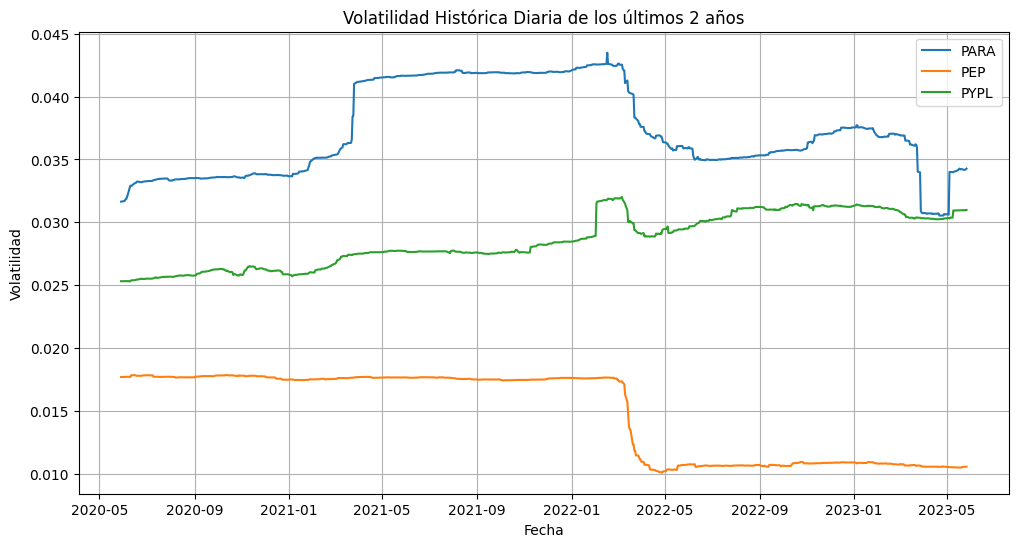

In [6]:
# Calcular rendimientos logarítmicos diarios (los 5 años)
Rendimientos = dfcierre.pct_change().apply(lambda x: np.log(1 + x))

#volatilidad paramétrica
vol_param2años = Rendimientos.rolling(window=504).std()

print(vol_param2años.dropna().tail(10))

# Graficar
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(vol_param2años[ticker], label=ticker)
plt.title("Volatilidad Histórica Diaria (Paramétrico)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.grid(True)
plt.show()

                PARA       PEP      PYPL
Date                                    
2023-05-15  0.033694  0.010368  0.031499
2023-05-16  0.033791  0.010957  0.030912
2023-05-17  0.034802  0.010335  0.031222
2023-05-18  0.034482  0.010365  0.031337
2023-05-19  0.033977  0.010096  0.030513
2023-05-22  0.033595   0.01072  0.031767
2023-05-23  0.035402  0.010819  0.031933
2023-05-24  0.034554  0.010751  0.030416
2023-05-25  0.033684  0.010614  0.030308
2023-05-26   0.03416  0.010403  0.030841


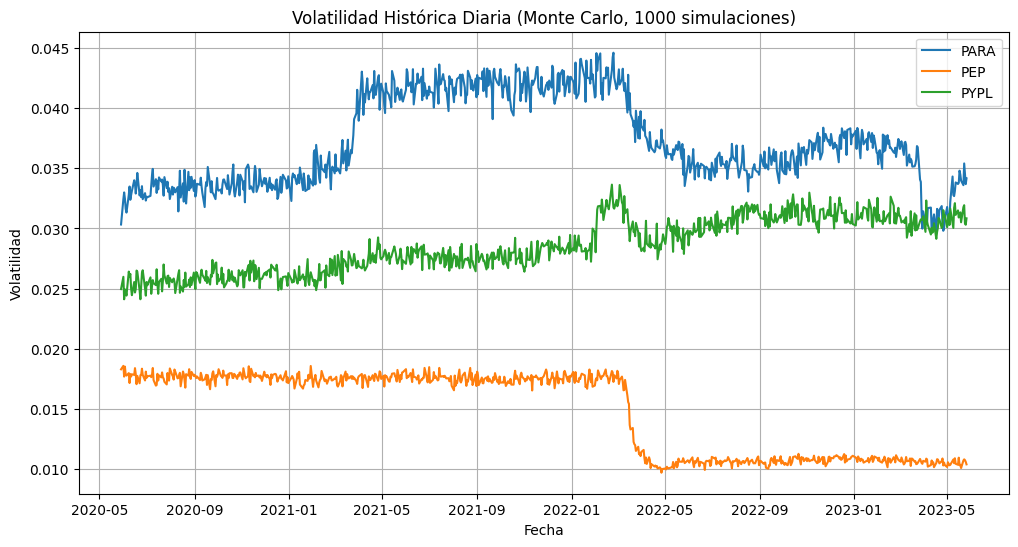

In [55]:
#################### Monte Carlo #######################
np.random.seed() #fija los números aleatorios para siguientes compilaciones
Nsimulaciones = 1000  # número de simulaciones
n = 504        # ventana para estimar media y std

# Diccionario para guardar resultados
vol_montecarlo = pd.DataFrame(index=Rendimientos.index, columns=tickers)

for ticker in tickers:
    series = Rendimientos[ticker]
    for i in range(n, len(series)):
        n_dato = series.iloc[i-n:i]
        mu = n_dato.mean()
        sigma = n_dato.std()

        # Simular 1000 rendimientos diarios
        Rsimulaciones = np.random.normal(mu, sigma, Nsimulaciones)

        # Estimar volatilidad como std de simulaciones
        vol_montecarlo.iloc[i, vol_montecarlo.columns.get_loc(ticker)] = np.std(Rsimulaciones)
print(vol_montecarlo.tail(10))

# Graficar
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(vol_montecarlo[ticker], label=ticker)
plt.title("Volatilidad Histórica Diaria (Monte Carlo, 1000 simulaciones)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.grid(True)
plt.show()

Ticker          PARA       PEP      PYPL
Date                                    
2021-05-27       NaN       NaN       NaN
2021-05-28  0.023464  0.015455  0.006656
2021-06-01  0.014684  0.008339  0.003544
2021-06-02  0.005051  0.004453  0.009634
2021-06-03  0.016670  0.001409  0.018970
...              ...       ...       ...
2023-05-22  0.016750  0.020073  0.027758
2023-05-23  0.008308  0.016451  0.033930
2023-05-24  0.009756  0.005264  0.012314
2023-05-25  0.015364  0.001681  0.025643
2023-05-26  0.066411  0.003383  0.036599

[504 rows x 3 columns]


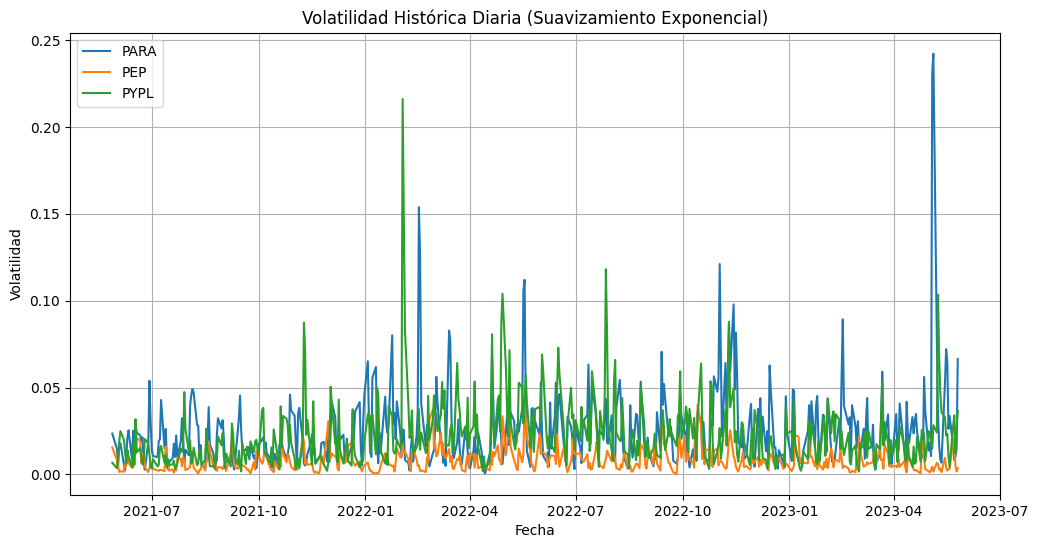

In [75]:
############################## EMA #####################################
R2años = Rendimientos.tail(504)
vol_ema = R2años.ewm(alpha=0.9).std()
print(vol_ema)

# Graficar
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(vol_ema[ticker], label=ticker)
plt.title("Volatilidad Histórica Diaria (Suavizamiento Exponencial)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.grid(True)
plt.show()

4. Construya un portafolio asignando tres pesos diferentes a estas tres acciones, argumente la diversificación en base a la volatilidad de los instrumentos individuales y a su perfil de riesgo

In [57]:
# Asignación de pesos
Apesos = pd.Series({"PEP": 0.60, "PYPL": 0.25, "PARA": 0.15})

# Mostrar pesos
print("Pesos del portafolio:")
print(Apesos)

Pesos del portafolio:
PEP     0.60
PYPL    0.25
PARA    0.15
dtype: float64


5. Distribuya un millón de pesos en este portafolio (sin considerar comisiones ni impuestos)

In [58]:
#### Hacer tipo de cambio ya que las acciones están en dólares
# Tipo de cambio MXN/USD
tipo_cambio = 17.5876  # Tipo de Cambio de Cierre de Jornada 29 de mayo 2023

# Capital en pesos mexicanos
dineromxn = 1_000_000

# Convertir a dólares
dolares = dineromxn / tipo_cambio

In [59]:
print(f"Capital disponible en USD: {dolares:.2f}\n")
# Asignación en USD por acción
Inversion = Apesos * dolares

print("Capital disponible en USD por acción:")
print(Inversion, "\n")


pfinales = dfcierre.loc["2023-05-26"]  # 29 fue feriado, tomamos el último día hábil

acciones_compradas = Inversion / pfinales

print("Acciones compradas por activo:") #acciones enteras
print(np.floor(acciones_compradas),"\n")

print("Dinero invertido por activo:") #acciones enteras
print(np.floor(acciones_compradas)*pfinales)

#dinero sobrante
k=np.floor(acciones_compradas)*pfinales
u=Inversion-k
print("")
print(f"Dinero sobrante en dólares: {sum(u):.4f}")

Capital disponible en USD: 56858.24

Capital disponible en USD por acción:
PEP     34114.944620
PYPL    14214.560258
PARA     8528.736155
dtype: float64 

Acciones compradas por activo:
PARA    591.0
PEP     197.0
PYPL    236.0
dtype: float64 

Dinero invertido por activo:
PARA     8528.698311
PEP     33994.794464
PYPL    14211.920288
dtype: float64

Dinero sobrante en dólares: 122.8280


6. Seleccione la serie histórica de volatilidades de entre las que generó en el punto 3 de acuerdo a su perfil de riesgo, calcule el Valor en Riesgo diario de los últimos dos años de cada uno de los activos individuales, grafique comparando los activos seleccionados.

VaR diario por activo:
                  PARA          PEP        PYPL
Date                                           
2021-05-28  329.162176   867.247967  155.628456
2021-06-01  205.998568   467.922984   82.869726
2021-06-02   70.855229   249.886552  225.254299
2021-06-03  233.851384    79.055003  443.523909
2021-06-04  250.873442    98.088400  582.162390
...                ...          ...         ...
2023-05-22  234.982142  1126.352359  649.004897
2023-05-23  116.551203   923.143168  793.324280
2023-05-24  136.863932   295.408923  287.904164
2023-05-25  215.534845    94.345883  599.553981
2023-05-26  931.651163   189.832442  855.728032

[503 rows x 3 columns] 



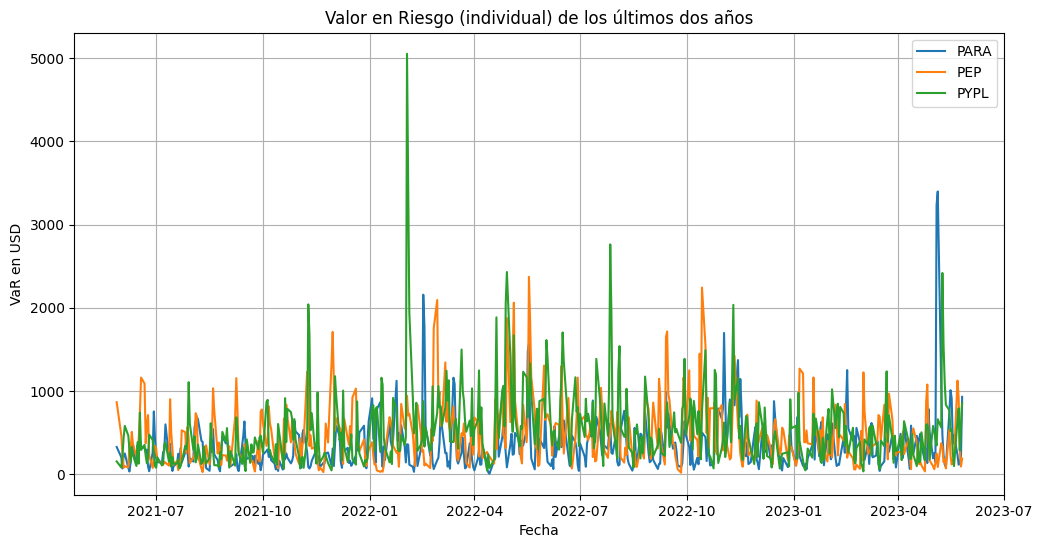

In [60]:
# Nivel de confianza
alpha = 0.95
Z_alpha = norm.ppf(1 - alpha)  # Negativo porque es pérdida

# VaR diario para cada activo con volatilidad EMA
VaR_individual = -Z_alpha * vol_ema.multiply(Inversion, axis=1)

# Mostrar algunos valores
print("VaR diario por activo:")
print(VaR_individual.dropna(),"\n")

# Graficar
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(VaR_individual[ticker], label=ticker)
plt.title("Valor en Riesgo (individual) de los últimos dos años")
plt.xlabel("Fecha")
plt.ylabel("VaR en USD")
plt.legend()
plt.grid(True)
plt.show()

7. Calcule el Valor en Riesgo diario de los últimos dos años del portafolio que decidió conformar, grafique.

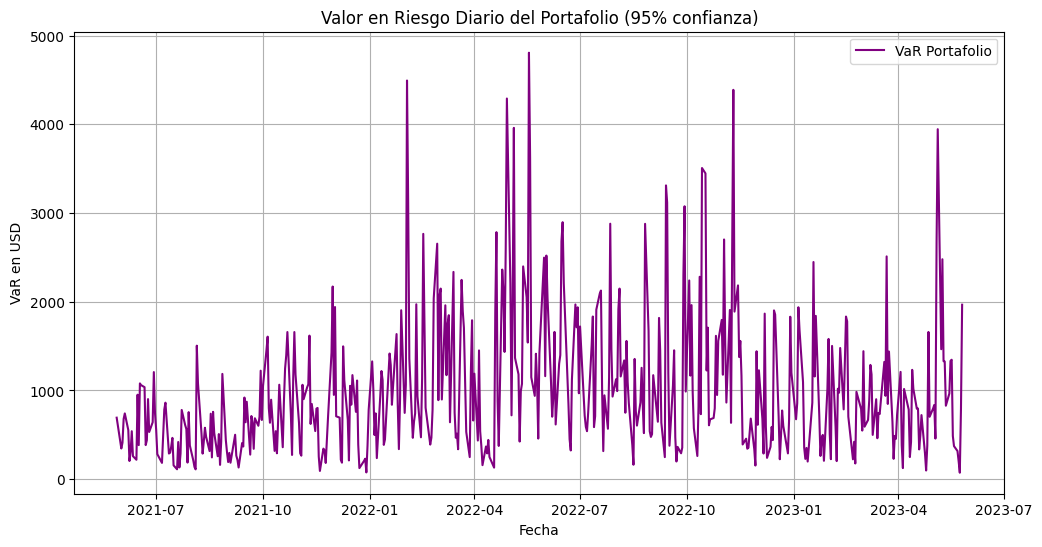

In [70]:
# Capital total en USD
valor_portafolio= dolares

# Obtener rendimientos de los 3 activos
r = R2años[tickers]

# Inicializar vector para el VaR del portafolio
VaR_portafolio = []

# Convertir pesos a arreglo
w = np.array([Apesos[t] for t in tickers])

# Matriz de covarianza diaria suavizada (EMA)
cov_matrices = r.ewm(alpha=0.9).cov(pairwise=True)

for date in r.index:
    if date!=r.index[0]:
        cov = cov_matrices.loc[date].loc[tickers, tickers].values
        port_vol = np.sqrt(w @ cov @ np.transpose(w))
        VaRdiario = -Z_alpha * port_vol * valor_portafolio
        VaR_portafolio.append(VaRdiario)
    else:
        VaR_portafolio.append(np.nan)  # Por si no hay datos al inicio

# Convertir a serie de tiempo
VaR_portafolio_series = pd.Series(VaR_portafolio, index=r.index)

plt.figure(figsize=(12,6))
plt.plot(VaR_portafolio_series, color='purple', label='VaR Portafolio')
plt.title("Valor en Riesgo Diario del Portafolio (95% confianza)")
plt.xlabel("Fecha")
plt.ylabel("VaR en USD")
plt.grid(True)
plt.legend()
plt.show()

8. Calcule los beta de los activos individuales

In [77]:
# Descargar datos del S&P 500 (índice de mercado)
sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Close"]

# Calcular rendimientos logarítmicos del mercado, sin NAs
sp500_returns = np.log(1 + sp500.pct_change()).dropna()

# Alinear fechas con las de nuestros activos
# Usar .loc para seleccionar filas basándose en el índice
sp500_returns = sp500_returns.loc[R2años.index].dropna()

[*********************100%***********************]  1 of 1 completed


In [79]:
betas = {}
for ticker in tickers:
    x = sp500_returns.values.reshape(-1, 1)  # regresor: mercado
    y = R2años[ticker].values       # respuesta: activo

    model = LinearRegression().fit(x, y)
    beta = model.coef_[0]
    betas[ticker] = beta
    print(f"Beta de {ticker}: {beta:.4f}")


Beta de PARA: 1.2958
Beta de PEP: 0.4494
Beta de PYPL: 1.5303


9 Calcule la beta del portafolio

In [80]:
# Ya tenemos los betas individuales y los pesos
beta_portafolio = sum(Apesos[ticker] * betas[ticker] for ticker in tickers)

print(f"Beta del portafolio: {beta_portafolio:.4f}")

Beta del portafolio: 0.8466
